### 1. Environment 

In [63]:
pip install matplotlib



     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 330.3 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 440.4 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 406.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.8 MB 991.0 kB/s eta 0:00:16
   ---------------------------------------- 0.1/15.8 MB 950.9 kB/s eta 0:00:17
    --------------------------------------- 0.2/15.8 MB 1.1 MB/s eta 0:00:14
    --------------------------------------- 0.2/15.8 MB 1.1 MB/s eta 0:00:15
    --------------------------------------- 0.3/15.8 MB 1.2 MB/s eta 0:00:14
    --------------------------------------- 0.4/15.8 MB 1.2 MB/s eta 0:00:14
   - ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [64]:
import numpy as np
import pandas as pd 
import yfinance as yf 
import matplotlib.pyplot as plt 
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6
import seaborn as sns
sns.set() 

### 2. Data download, storage in dataframe

In [65]:
stock = yf.download('AMZN')

[*********************100%%**********************]  1 of 1 completed


In [95]:
stock.head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\ramasastrydatta\Downloads\New folder\Lib\site-packages\IPython\core\formatters.py", line 223, in catch_format_error
    r = method(self, *args, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ramasastrydatta\Downloads\New folder\Lib\site-packages\IPython\core\formatters.py", line 344, in __call__
    return method()
           ^^^^^^^^
  File "C:\Users\ramasastrydatta\Downloads\New folder\Lib\site-packages\pandas\core\frame.py", line 1175, in _repr_html_
    # check whether repr fits horizontal by actually checking
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ramasastrydatta\Downloads\New folder\Lib\site-packages\pandas\io\formats\format.py", line 1074, in to_html
  File "C:\Users\ramasastrydatta\Downloads\New folder\Lib\site-packages\pandas\io\formats\html.py", line 88, in to_string
    lines = self.render()
            ^^^^^^^^^^^^^
  File "C:\Users\ramasastrydatta\Downloads\New fo

                Open      High       Low     Close  Adj Close      Volume
Date                                                                     
1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000
1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000
1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000
1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000
1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000

### 4. Store instanteneous rate of return 

In [76]:
stock_close = stock['Close']
stock_return = round(np.log(stock_close).diff() * 100, 2)
stock_return.head()


Date
1997-05-15      NaN
1997-05-16   -12.45
1997-05-19    -1.21
1997-05-20    -4.36
1997-05-21   -13.63
Name: Close, dtype: float64

### 4. Plot the graph 

In [77]:
stock_return.plot()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\ramasastrydatta\Downloads\New folder\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ramasastrydatta\AppData\Local\Temp\ipykernel_7864\1666715025.py", line 1, in <module>
    stock_return.plot()
  File "C:\Users\ramasastrydatta\Downloads\New folder\Lib\site-packages\pandas\plotting\_core.py", line 951, in __call__
    )
      
  File "C:\Users\ramasastrydatta\Downloads\New folder\Lib\site-packages\pandas\plotting\_core.py", line 1947, in _get_plot_backend
  File "C:\Users\ramasastrydatta\Downloads\New folder\Lib\site-packages\pandas\plotting\_core.py", line 1877, in _load_backend
    ) from None
ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ramasastrydatta\Download

### Describe 

In [78]:
stock_return.dropna(inplace= True)
stock_return.describe()

count    6821.000000
mean        0.110736
std         3.500834
min       -28.460000
25%        -1.310000
50%         0.040000
75%         1.460000
max        29.620000
Name: Close, dtype: float64

### Another way to describe 

In [79]:
from scipy import stats

In [88]:
#kurtosis  is the excess above 3, way more peaked, leptokurtic
n, minmax, mean, var, skew, kurt = stats.describe(stock_return)
mini, maxi = minmax
std = var ** .5

### 9. For comparison  generate random numbers to follow normal distribution 

In [89]:
from scipy.stats import norm 

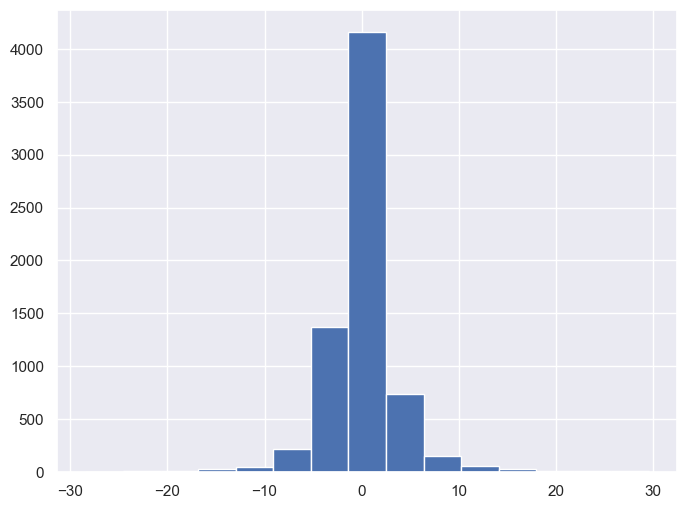

In [93]:
plt.hist(stock_return, bins = 15);

In [97]:
from scipy.stats import norm
x = norm.rvs(mean, std, n)

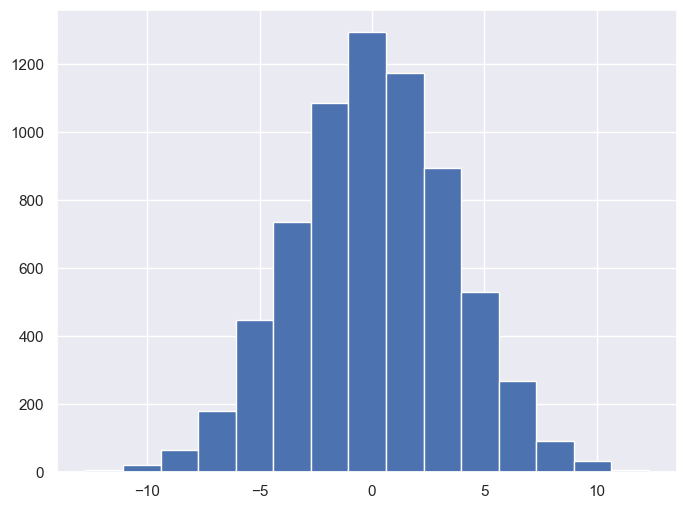

In [98]:
plt.hist(x, bins=15);

### Is price change normally distributed 

### 10. Use of scipy stats to test the k, null is that the sample is drawn from a population where underlying kurtosis is that of a normally distributed variable 

In [114]:
x_test = stats.kurtosistest(x)
stock_test = stats.kurtosistest(stock_return)
#formatting 
print(f'{"     Test Statistic":20}{"p-value":>15}')
print(f'{"     "}{"-"*30}')
print (f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print (f"Stock:{stock_test[0]:13.2f}{stock_test[1]:16.4f}")


     Test Statistic         p-value
     ------------------------------
x:            -0.96          0.3384
Stock:        34.05          0.0000


### 11. Plot histogram of price changes with normal curve overlay 

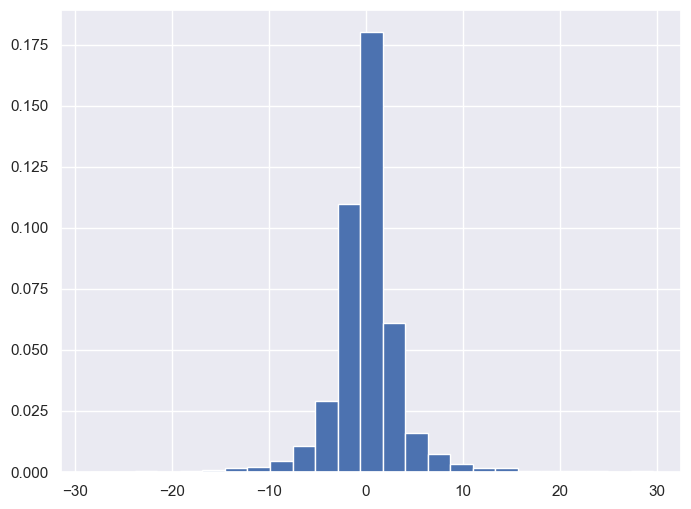

In [116]:
plt.hist(stock_return, bins = 25, edgecolor = 'w', density = True)
overlay = np